# 1. Импорт библиотек

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning






*   numpy и pandas: для работы с массивами и таблицами данных.
*   matplotlib.pyplot: для построения графиков.

*   VAR: векторная авторегрессионная модель (VAR) из библиотеки statsmodels, используемая для моделирования временных рядов.
*   warnings: для подавления предупреждений.

*   ValueWarning, ConvergenceWarning: специфические типы предупреждений, которые могут возникнуть при работе с временными рядами.










# 2. Подавление предупреждений

In [ ]:
warnings.simplefilter(action='ignore', category=Warning)
warnings.simplefilter('ignore', category=ValueWarning)
warnings.simplefilter('ignore', category=ConvergenceWarning)


Здесь мы игнорируем общие и специфические предупреждения, которые могут возникать в процессе выполнения моделей VAR, чтобы не засорять вывод ненужной информацией.

#3. Загрузка данных

In [ ]:
data = pd.read_csv('svar_realistic_test_data.csv')


Этот код загружает CSV-файл с данными о показателях, таких как:

*   Labor Productivity Index — индекс производительности труда.
*   Real Wages Index — индекс реальной заработной платы.

*   Unemployment Index — индекс безработицы.
*   Migration Growth Rate — темп роста миграции.





# 4. Подготовка данных

In [ ]:
endogenous_vars = data[['Labor Productivity Index', 'Real Wages Index', 'Unemployment Index']]
exogenous_var = data[['Migration Growth Rate']]




*   endogenous_vars: это переменные, которые мы будем моделировать как эндогенные (внутренние) в модели VAR — те, которые зависят друг от друга.
*  exogenous_var: экзогенная переменная — это переменная, которая влияет на модель, но не зависит от других переменных в модели. В данном случае это темп роста миграции.



# 5. Дифференцирование данных

In [ ]:
endogenous_diff = endogenous_vars.diff().dropna()

Мы дифференцируем данные, чтобы сделать их стационарными. Это важно, так как модели VAR требуют, чтобы данные были стационарными (без трендов и сезонных колебаний). Дифференцирование помогает устранить тренды.

# 6. Визуализация дифференцированных данных

In [ ]:
endogenous_diff.plot(subplots=True)
plt.show()

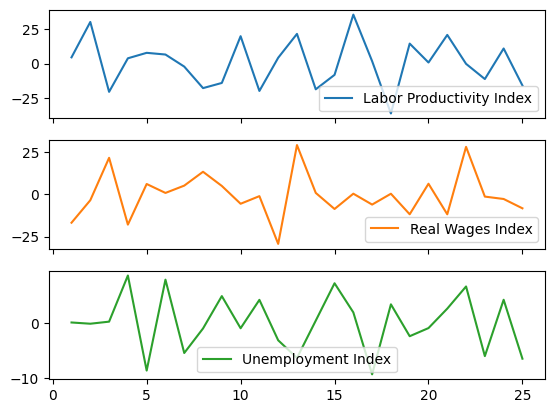

Эта строка строит графики для каждой эндогенной переменной после дифференцирования, чтобы можно было визуально оценить данные.

# 7. Построение модели VAR с экзогенной переменной

In [ ]:
mod = VAR(endogenous_diff, exog=exogenous_var[1:])
res = mod.fit(maxlags=2, ic=None, trend='c')




*   VAR(endogenous_diff, exog=exogenous_var[1:]): создание модели VAR. Мы передаем дифференцированные эндогенные переменные и экзогенную переменную (темп роста миграции).
*   mod.fit(maxlags=2, ic=None, trend='c'): подгонка модели с максимумом в 2 лага и наличием константы (trend='c').



# 8. Вывод резюме модели

In [ ]:
print(res.summary())


Эта строка выводит на экран сводку результатов модели, включая коэффициенты и статистику, описывающую, как переменные взаимодействуют друг с другом.

 Summary of Regression Results   
==================================
Model:                         VAR
Method:                        OLS
Date:           Wed, 02, Oct, 2024
Time:                     09:06:17
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    15.3506
Nobs:                     23.0000    HQIC:                   14.4637
Log likelihood:          -236.813    FPE:                1.55437e+06
AIC:                      14.1657    Det(Omega_mle):         634822.
--------------------------------------------------------------------
Results for equation Labor Productivity Index
==============================================================================================
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
const                               3.506984        13.273754            0.264           0.792
Migration Growth Rate              -3.399949        13.214700           -0.257           0.797
L1.Labor Productivity Index        -0.625599         0.215985           -2.896           0.004
L1.Real Wages Index                -0.269648         0.320275           -0.842           0.400
L1.Unemployment Index               1.176047         0.744792            1.579           0.114
L2.Labor Productivity Index        -0.384928         0.243408           -1.581           0.114
L2.Real Wages Index                -0.335051         0.302269           -1.108           0.268
L2.Unemployment Index               0.997988         0.748112            1.334           0.182
==============================================================================================

Results for equation Real Wages Index
==============================================================================================
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
const                              13.284154        11.425617            1.163           0.245
Migration Growth Rate             -12.866210        11.374785           -1.131           0.258
L1.Labor Productivity Index         0.381747         0.185913            2.053           0.040
L1.Real Wages Index                -0.169350         0.275683           -0.614           0.539
L1.Unemployment Index              -0.817067         0.641093           -1.274           0.202
L2.Labor Productivity Index        -0.214626         0.209518           -1.024           0.306
L2.Real Wages Index                 0.195448         0.260183            0.751           0.453
L2.Unemployment Index              -0.420008         0.643950           -0.652           0.514
==============================================================================================

Results for equation Unemployment Index
==============================================================================================
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
const                               2.267139         4.663586            0.486           0.627
Migration Growth Rate              -2.148227         4.642838           -0.463           0.644
L1.Labor Productivity Index        -0.023410         0.075884           -0.308           0.758
L1.Real Wages Index                 0.099660         0.112525            0.886           0.376
L1.Unemployment Index              -0.641211         0.261675           -2.450           0.014
L2.Labor Productivity Index         0.022141         0.085519            0.259           0.796
L2.Real Wages Index                 0.131870         0.106199            1.242           0.214
L2.Unemployment Index              -0.152537         0.262841           -0.580           0.562
==============================================================================================

Correlation matrix of residuals
                            Labor Productivity Index  Real Wages Index  Unemployment Index
Labor Productivity Index                    1.000000         -0.083253            0.280315
Real Wages Index                           -0.083253          1.000000            0.075738
Unemployment Index                          0.280315          0.075738            1.000000

# 9. Подгонка модели с использованием критерия Байеса (BIC)

In [ ]:
res = mod.fit(maxlags=2, ic='bic', trend='c')


Здесь модель VAR подгоняется с использованием информационного критерия Байеса (BIC), чтобы выбрать оптимальное количество лагов для модели.

# 10. Вывод количества лагов

In [ ]:
print(res.k_ar)


Это выводит оптимальное количество лагов, выбранных на основе BIC.

1

# 11. Визуализация остатков модели

In [ ]:
res.resid.plot(subplots=True)
plt.show()


Строим графики остатков модели для каждой эндогенной переменной, чтобы визуально оценить, есть ли признаки автокорреляции или другие паттерны.



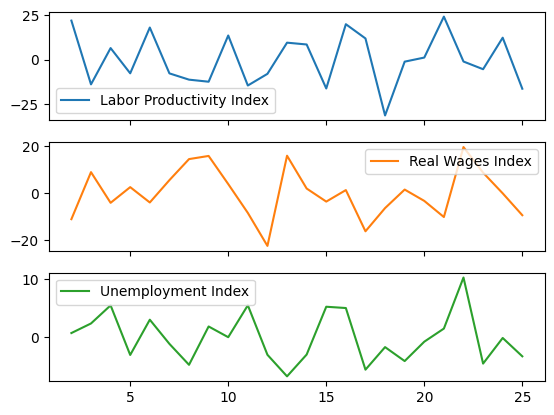

# 12. Автокорреляция остатков (ACF)

In [ ]:
res.plot_acorr()
plt.show()


Эта строка строит графики автокорреляционной функции (ACF) для остатков модели, чтобы проверить наличие автокорреляции.

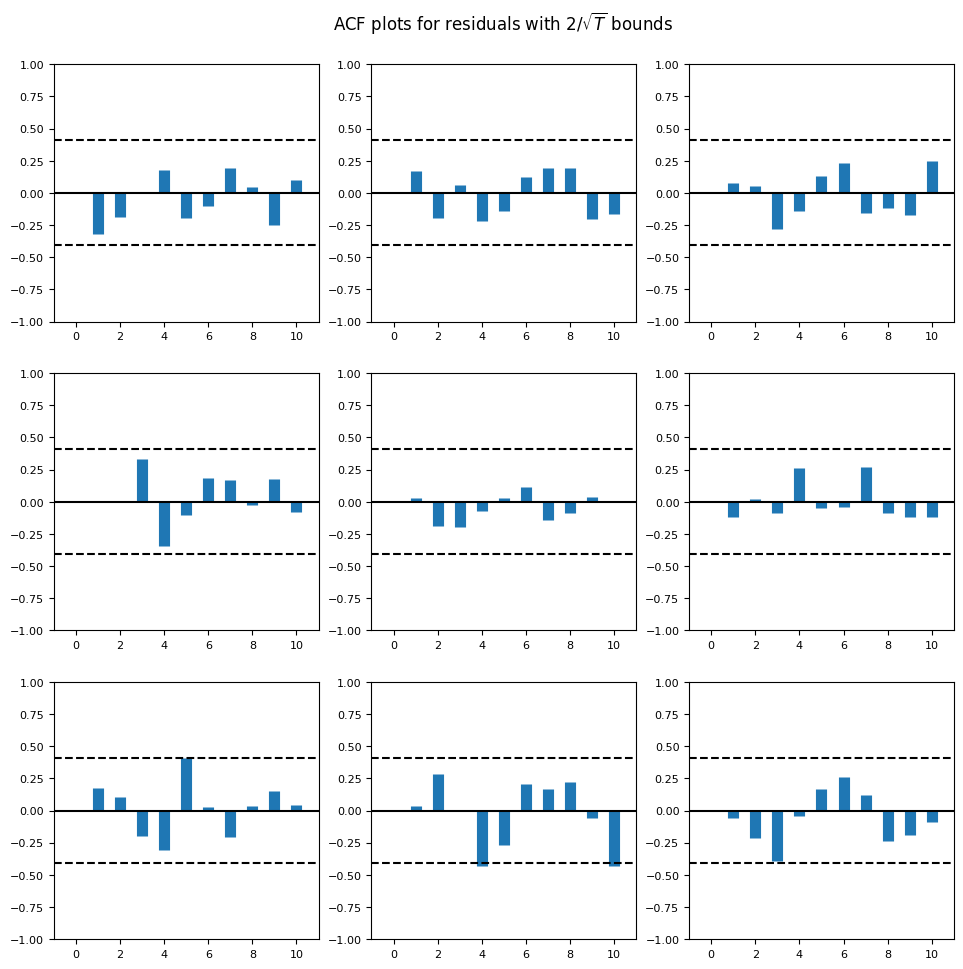

# 13. Тест на серийную корреляцию остатков

In [ ]:
print(res.test_whiteness(nlags=10, signif=0.05, adjusted=True).summary())


Этот тест проверяет, есть ли серийная корреляция в остатках модели (то есть, зависит ли ошибка на одном шаге от ошибки на предыдущих шагах). Серийная корреляция в остатках может указывать на проблемы с моделью.

Adjusted Portmanteau-test for residual autocorrelation. H_0: residual autocorrelation up to lag 10 is zero. Conclusion: fail to reject H_0 at 5% significance level.
========================================
Test statistic Critical value p-value df
----------------------------------------
         98.51          103.0   0.090 81
----------------------------------------

# 14. Подготовка будущих значений для экзогенной переменной

In [ ]:
exog_future = exogenous_var.iloc[-20:].values


Здесь выбираются последние 20 значений экзогенной переменной (темп роста миграции) для прогноза будущих значений эндогенных переменных.

# 15. Прогнозирование на 20 шагов вперед

In [ ]:
forecast = res.forecast(y=endogenous_diff.tail(res.k_ar).values, steps=20, exog_future=exog_future)


Мы делаем прогноз на 20 шагов вперед для эндогенных переменных, используя экзогенные данные.

# 16. Построение прогноза вручную

In [ ]:
forecast_index = pd.date_range(start=data['Year'].iloc[-1] + 1, periods=20, freq='A')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=endogenous_diff.columns)


Создаем датафрейм для хранения прогнозных значений с временным индексом.

# 17. Визуализация прогноза

In [ ]:
fig, axes = plt.subplots(nrows=len(endogenous_diff.columns), ncols=1, figsize=(10, 8))

for i, col in enumerate(endogenous_diff.columns):
    axes[i].plot(endogenous_diff.index, endogenous_diff[col], label=f"Исторические {col}")
    axes[i].plot(forecast_df.index, forecast_df[col], label=f"Прогноз {col}", linestyle='--')
    axes[i].legend(loc='best')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


Этот блок строит графики, показывающие как исторические данные, так и прогнозируемые значения для каждой эндогенной переменной.

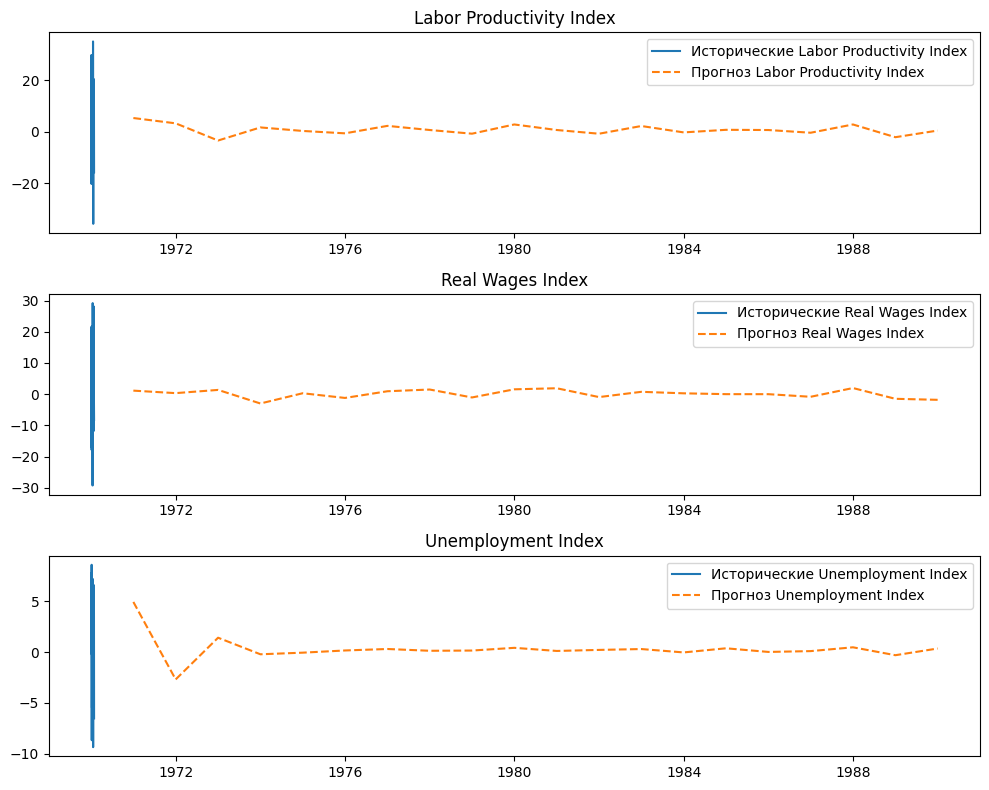

# 18. Импульсные отклики

In [ ]:
res.irf(periods=10).plot(signif=0.05)
plt.show()


Строим графики импульсных откликов (IRF), которые показывают, как шок в одной переменной влияет на другие переменные через некоторое количество шагов.

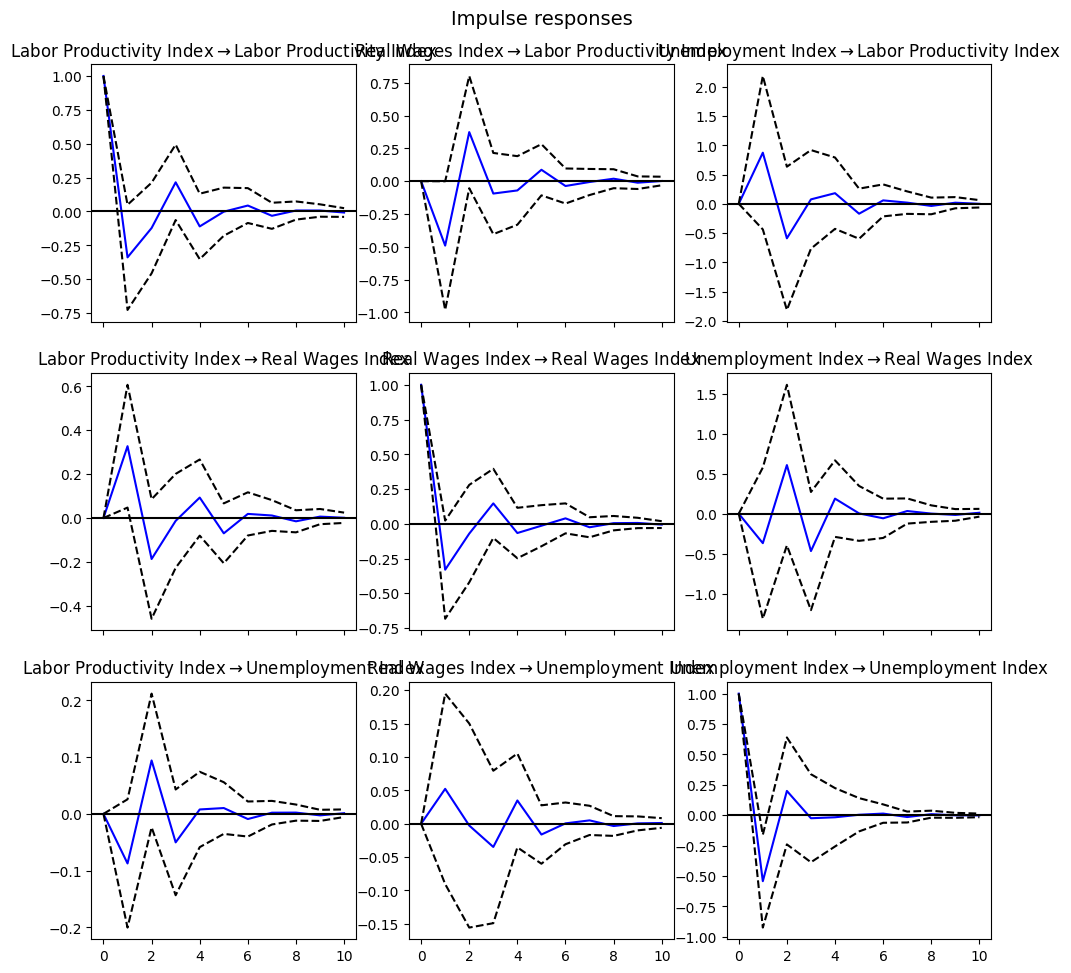

# 19. Декомпозиция дисперсии ошибки прогноза

In [ ]:
res.fevd(periods=10).plot()
plt.show()


Этот график показывает, какая часть дисперсии ошибки прогноза для каждой переменной объясняется другими переменными.

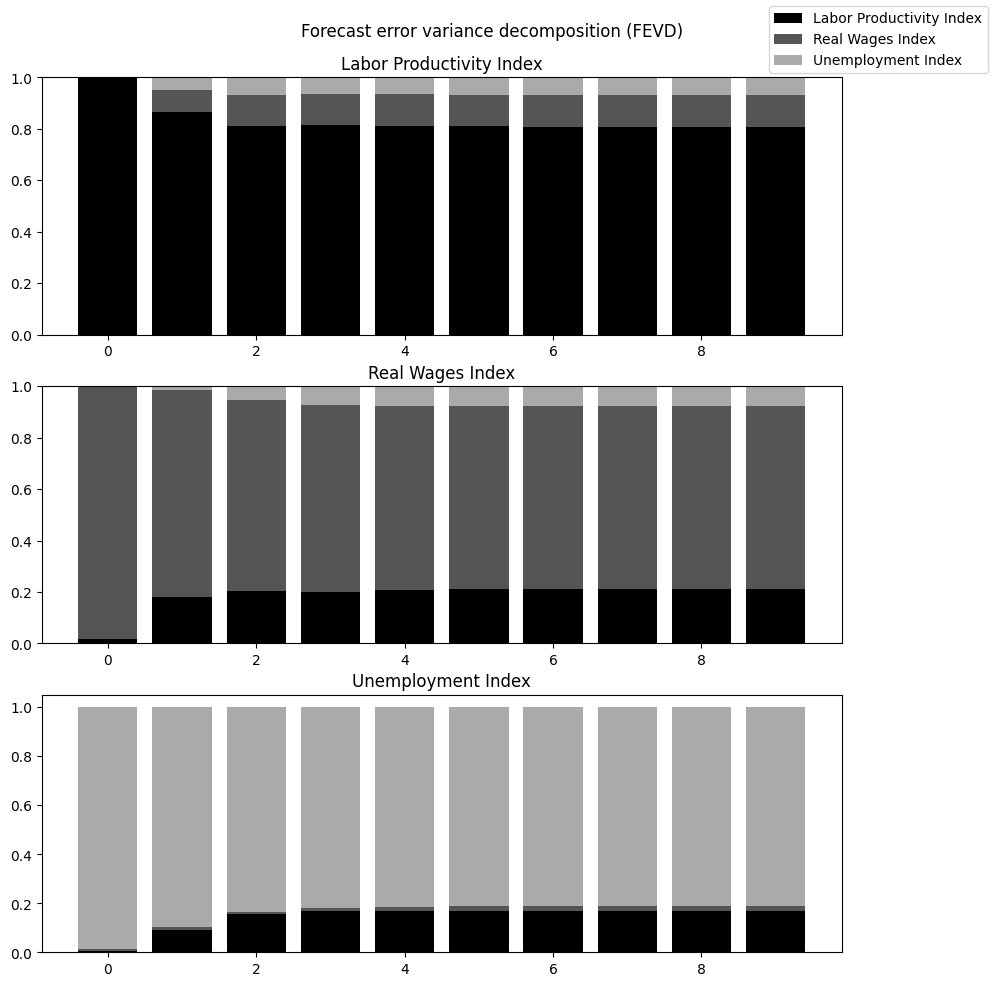

# 20. Тест на причинную связь (Granger Causality Test)

In [ ]:
print(res.test_causality(caused=['Labor Productivity Index', 'Real Wages Index'],
                         causing=['Unemployment Index'], signif=0.01).summary())


Этот тест проверяет, существует ли причинная связь между индексом безработицы и другими переменными (индекс производительности труда и реальной заработной платы).

Granger causality F-test. H_0: Unemployment Index does not Granger-cause [Labor Productivity Index, Real Wages Index]. Conclusion: fail to reject H_0 at 1% significance level.
=============================================
Test statistic Critical value p-value    df  
---------------------------------------------
         1.036          4.998   0.361 (2, 57)
---------------------------------------------